In [12]:
# load data
import sys
sys.path.append('..')
sys.path.append('.')

from diagnostic_assistant.preprocess.load_data import * 
from diagnostic_assistant.utils.utils import symptom_to_label, \
    label_to_symptom, disease_to_label, label_to_disease,\
    convert_dis_to_onehot, convert_to_onehot, convert_to_symptoms, convert_to_disease


max_len = 1
idx = 0
df_data = get_dataset()
# iterate through the dataset and convert the symptoms and diseases to labels
for idx, row in df_data.iterrows():
    disease = row[0]
    # remove the trailing whitespace
    disease = disease.strip()
    
    # convert the disease to label
    label = disease_to_label[disease]
    # set the label
    row[0] = label
    # iterate through the symptoms
    for i in range(1, len(row)):
        symptom = row[i]
        if type(symptom) == float:
            row[i] = 0
            continue
        if i > max_len:
            max_len = i
            idx = idx
        symptom = symptom.strip()
        # convert the symptom to label
        label = symptom_to_label[symptom]
        # set the label
        row[i] = label
print(df_data.head())

/tmp/ipykernel_29127/1753722208.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disease = row[0]
/tmp/ipykernel_29127/1753722208.py:24: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  row[0] = label
/tmp/ipykernel_29127/1753722208.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  symptom = row[i]
/tmp/ipykernel_29127/1753722208.py:38: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future 

  Disease Symptom_1 Symptom_2 Symptom_3 Symptom_4 Symptom_5 Symptom_6  \
0      16         1         2         3       103         0         0   
1      16         2         3       103         0         0         0   
2      16         1         3       103         0         0         0   
3      16         1         2       103         0         0         0   
4      16         1         2         3         0         0         0   

  Symptom_7 Symptom_8 Symptom_9 Symptom_10 Symptom_11 Symptom_12 Symptom_13  \
0         0         0         0          0          0          0          0   
1         0         0         0          0          0          0          0   
2         0         0         0          0          0          0          0   
3         0         0         0          0          0          0          0   
4         0         0         0          0          0          0          0   

  Symptom_14 Symptom_15 Symptom_16 Symptom_17  
0          0          0          0    

In [13]:
# data augmentation
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# np.random.seed(42)

# split the data into train and test
X = df_data.iloc[:, 1:].values
Y = df_data.iloc[:, 0].values

# data augmentation
X_new = []
y_new = []
for xi in range(len(X)):
    # get the number not equal to 0
    x = X[xi]
    y = Y[xi]
    n = np.count_nonzero(x)
    # randomly drop N symptoms
    for i in range(n):
        # randomly select N symptoms from x
        xn = []
        for j in range(n):
            if np.random.rand() > 0.5:
                xn.append(x[j])
        if len(xn) == 0:
          continue
        else:
          # print(xn)
          X_new.append(xn)
          y_new.append(y)

print(len(X))                    
print(len(X_new))

4920
36129


In [14]:
# generate training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2)

# convert the symptoms to onehot
X_train = np.array([convert_to_onehot(symptoms) for symptoms in X_train])
X_test = np.array([convert_to_onehot(symptoms) for symptoms in X_test])

# convert the diseases to onehot
y_train = np.array([convert_dis_to_onehot(disease) for disease in y_train])
y_test = np.array([convert_dis_to_onehot(disease) for disease in y_test])


In [19]:
# create the model
model = MLPClassifier(hidden_layer_sizes=(100, 100, 100, 100), max_iter=100, alpha=0.0001,
                     solver='adam', verbose=10, random_state=21,tol=0.000000001, batch_size=64)


Iteration 1, loss = 3.64282861
Iteration 2, loss = 0.36797958
Iteration 3, loss = 0.29624324
Iteration 4, loss = 0.27888377
Iteration 5, loss = 0.26918733
Iteration 6, loss = 0.26243233
Iteration 7, loss = 0.25954777
Iteration 8, loss = 0.25403487
Iteration 9, loss = 0.25045651
Iteration 10, loss = 0.24679975
Iteration 11, loss = 0.24611632
Iteration 12, loss = 0.24448552
Iteration 13, loss = 0.24190774
Iteration 14, loss = 0.23904557
Iteration 15, loss = 0.24014733
Iteration 16, loss = 0.23571507
Iteration 17, loss = 0.23714691
Iteration 18, loss = 0.23407200
Iteration 19, loss = 0.23210590
Iteration 20, loss = 0.23302481
Iteration 21, loss = 0.22948149
Iteration 22, loss = 0.23008934
Iteration 23, loss = 0.22906977
Iteration 24, loss = 0.22852655
Iteration 25, loss = 0.22752183
Iteration 26, loss = 0.22640066
Iteration 27, loss = 0.22532013
Iteration 28, loss = 0.22629084
Iteration 29, loss = 0.22480823
Iteration 30, loss = 0.22380135
Iteration 31, loss = 0.22167058
Iteration 32, los

/chalmers/users/chenhon/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


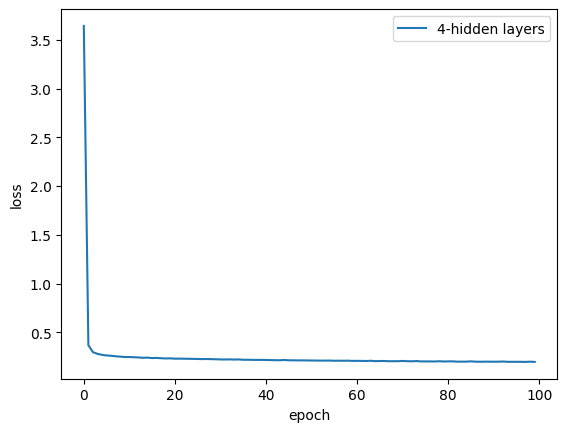

In [20]:
# train the model
model.fit(X_train, y_train)

# test the model
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

# extrat the ouput loss and plot it 
loss_values = model.loss_curve_
import matplotlib.pyplot as plt
plt.plot(loss_values)
plt.legend(['4-hidden layers'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [ ]:
# save the model
import joblib

filename = './model/trained/finalized_model.sav'
joblib.dump(model, open(filename, 'wb'))

In [21]:
# load the model, sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import joblib

filename = './model/trained/finalized_model.sav'
model = joblib.load(open(filename, 'rb'))

X = df_data.iloc[:, 1:].values
Y = df_data.iloc[:, 0].values

X_test = np.array([convert_to_onehot(symptoms) for symptoms in X])
y_test = np.array([convert_dis_to_onehot(disease) for disease in Y])

# test the model
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

1.0


In [ ]:
# test 
test_sample = X_test[0]
test_sample_label = y_test[0]
print(test_sample)
print(test_sample_label)

print(convert_to_symptoms(test_sample))
print(convert_to_disease(test_sample_label))

# do the prediction, show the posibility of each disease
y_pred = model.predict_proba([test_sample])
print(y_pred)


[1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic_patches']
Fungal infection
[[6.83114274e-26 2.76997755e-30 2.22701813e-13 2.99616998e-16
  2.30133092e-09 6.55427627e-29 1.98490067e-22 1.79874999e-12
  6.66417441e-12 6.01846191e-18 1.22374960e-22 1.31616039e-13
  6.11645240e-23 1.07578355e-27 5.73520024e-08 9.99990857e-01
  1.35061128e-32 1.97314333e-16 3.25111879e-27 9.22520659e-12
  4.93480187e-28 3.21286128e-19 1.86450376e-27 4.25797009e-14
  2.4992308

In [ ]:
# when some symptoms is mussed 
test_sample= X_test[0]

predict = model.predict([test_sample])
print("predict result:", predict)
print("predict result:",convert_to_disease(predict[0]))
print("ground true:",convert_to_disease(y_test[0]))

# 
disease = 'Fungal infection'
symptoms = ['itching','skin_rash','nodal_skin_eruptions','dischromic_patches']

x = [symptom_to_label[symptom] for symptom in symptoms]
x = convert_to_onehot(x)
y = disease_to_label[disease]
predict = model.predict([x])
print(predict)
print("predict result:",convert_to_disease(predict[0]))
print("ground true:",disease)   


# only one symptom
print("--------------only one symptom-----------------")
symptoms = ['itching']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = convert_to_onehot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(convert_dis_to_onehot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)


# only two symptom
print("--------------only two symptom-----------------")
symptoms = ['itching','nodal_skin_eruptions']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = convert_to_onehot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(convert_dis_to_onehot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)

print("--------------only one symptom-----------------")
disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = convert_to_onehot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(convert_dis_to_onehot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)

print("-------------- two symptom-----------------")
disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills','fatigue']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = convert_to_onehot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(convert_dis_to_onehot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)

print("-------------- three symptom-----------------")
disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills','fatigue', 'nausea']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = convert_to_onehot(x)
predict = model.predict_proba([x])
# get top3 diseases
topN = np.argsort(predict[0])[-10:]
print("topN:",topN)
print("topN:",[convert_to_disease(convert_dis_to_onehot(label+1)) for label in topN])
print("topN:",predict[0][topN])
print("ground true:",disease)



predict result: [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0]]
predict result: Fungal infection
ground true: Fungal infection
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0]]
predict result: Fungal infection
ground true: Fungal infection
--------------only one symptom-----------------
topN: [34  8 19  3 35  4 28  9 14 15]
topN: ['Pneumonia', 'Chicken pox', 'Hepatitis B', 'Alcoholic hepatitis', 'Psoriasis', 'Allergy', 'Jaundice', 'Chronic cholestasis', 'Drug Reaction', 'Fungal infection']
topN: [0.00048667 0.00076198 0.00310375 0.00313387 0.00540128 0.00540184
 0.03901255 0.12510835 0.38583595 0.38733182]
ground true: Fungal infection
--------------only two symptom-----------------
topN: [34  7 19 35 28  4 27 14 31 15]
topN: ['Pneumonia', 'Cervical spondylosis', 'Hepatitis B', 'Psoriasis', 'Jaundice', 'Allergy', 'Impetigo', 'Drug Reaction', 'Osteoarthristis', 'Fungal infection']
topN: [3.86538839e-07 2.48075

In [ ]:
from diagnostic_assistant.model.FCModel import FCModel

disease = 'Dengue'
# chills, joint_pain, vomiting, fatigue, high_fever, headache, nausea, loss_of_appetite, pain_behind_the_eyes, back_pain, malaise, muscle_pain, red_spots_over_body
symptoms = ['chills','fatigue', 'nausea']
x = [symptom_to_label[symptom] for symptom in symptoms]
x = convert_to_onehot(x)

model = FCModel()
model.predict_topN(x)

print("ground true:",disease)
print([convert_to_disease(convert_dis_to_onehot(label+1)) for label in model.predict_topN(x)[0]])

ground true: Dengue
['Hepatitis C', 'Jaundice', 'Chicken pox', 'Hypoglycemia', 'Hepatitis D', 'Common Cold', 'Tuberculosis', 'Malaria', 'Dengue', 'Typhoid']
